In [26]:
 # Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_PH = df[df['job_country'] == 'Philippines']

In [4]:
df_skills = df_PH.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
76,Data Analyst - 14785091749,sql
76,Data Analyst - 14785091749,python
76,Data Analyst - 14785091749,r
76,Data Analyst - 14785091749,excel
76,Data Analyst - 14785091749,tableau
...,...,...
785690,Customer Master Data Specialist,vba
785690,Customer Master Data Specialist,sap
785690,Customer Master Data Specialist,word
785690,Customer Master Data Specialist,powerpoint


In [8]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
276,excel,Data Analyst,2242
1002,sql,Data Analyst,1781
1003,sql,Data Engineer,1303
777,python,Data Engineer,1097
776,python,Data Analyst,980
...,...,...,...
1060,t-sql,Machine Learning Engineer,1
169,codecommit,Data Engineer,1
168,cobol,Software Engineer,1
167,clickup,Senior Data Analyst,1


In [10]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = job_titles[:3]

job_titles

['Data Analyst', 'Data Engineer', 'Business Analyst']

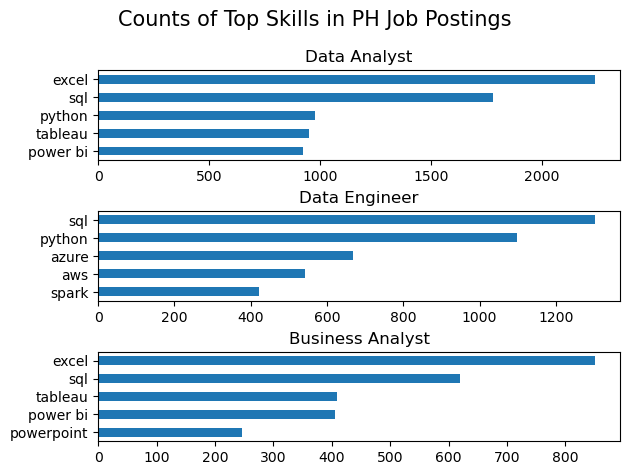

In [16]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in PH Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()

In [19]:
df_job_title_count = df_PH['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,4766
1,Data Engineer,2051
2,Business Analyst,1725
3,Data Scientist,1347
4,Software Engineer,546
5,Senior Data Analyst,542
6,Senior Data Engineer,299
7,Cloud Engineer,200
8,Senior Data Scientist,186
9,Machine Learning Engineer,124


In [24]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc['skill_percent'] = 100 * df_skills_perc['skill_count'] / df_skills_perc['jobs_total']

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,excel,Data Analyst,2242,4766,47.041544
1,sql,Data Analyst,1781,4766,37.368863
2,sql,Data Engineer,1303,2051,63.529985
3,python,Data Engineer,1097,2051,53.486104
4,python,Data Analyst,980,4766,20.562316
...,...,...,...,...,...
1223,t-sql,Machine Learning Engineer,1,124,0.806452
1224,codecommit,Data Engineer,1,2051,0.048757
1225,cobol,Software Engineer,1,546,0.183150
1226,clickup,Senior Data Analyst,1,542,0.184502


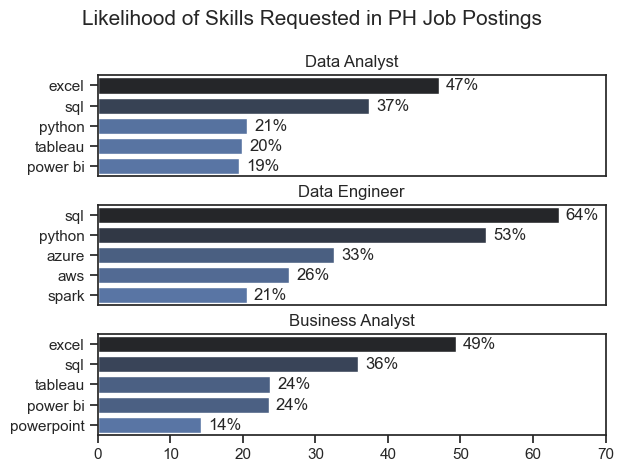

In [40]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 70)

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in PH Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()